In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint
import seaborn as sns
from scipy import integrate
sns.set()
sns.despine()


<Figure size 640x480 with 0 Axes>

In [105]:
p_temp_data = pd.read_csv('./3fungi_data/fungi_p.sang.s_temp.csv')
t_temp_data = pd.read_csv('./3fungi_data/fungi_t.chion.n_temp.csv')
x_temp_data = pd.read_csv('./3fungi_data/fungi_x.sub.s_temp.csv')
### read moisture data
p_moist_data = pd.read_csv('./3fungi_data/fungi_p.sang.s_moist.csv')
t_moist_data = pd.read_csv('./3fungi_data/fungi_t.chion.n_moist.csv')
x_moist_data = pd.read_csv('./3fungi_data/fungi_x.sub.s_moist.csv')

In [106]:
### compitition model

def competition_model(r_p, r_t, r_x, p_Decomposition_rate, t_Decomposition_rate, x_Decomposition_rate , n_p, n_t, n_x, init_p, init_t, init_x, time):
    def diff(w, t):
        p, t, x = w
        return np.array([r_p * p * (1 - p / n_p - s_pt * t / n_t - s_px * x / n_x), r_t * t * (1 - t / n_t - s_tp * p / n_p - s_tx * x / n_x), r_x * x * (1 - x / n_x - s_xp * p / n_p - s_xt * t / n_t)])
    
    ### conditions: 1. 22C
    s_pt = t_Decomposition_rate/p_Decomposition_rate
    s_px = x_Decomposition_rate/p_Decomposition_rate
    s_tp = p_Decomposition_rate/t_Decomposition_rate
    s_tx = x_Decomposition_rate/t_Decomposition_rate
    s_xp = p_Decomposition_rate/x_Decomposition_rate
    s_xt = t_Decomposition_rate/x_Decomposition_rate
    ### capability of the decomposition rate of unit density of fungi
    p_capability=p_Decomposition_rate/init_p
    t_capability=t_Decomposition_rate/init_t
    x_capability=x_Decomposition_rate/init_x
    solution = odeint(diff, [init_p, init_t, init_x], time)
    plt.figure(figsize=(15, 5))
    plt.subplot(1,3,1)
    plt.title('Competition Model for 3 Fungi density', font={'family':'Times New Roman', 'size':15})
    plt.xlabel('Time', font={'family':'Times New Roman', 'size':12}, loc='right')
    plt.ylabel('Fungi Density', font={'family':'Times New Roman', 'size':12}, loc='top')
    plt.plot(time, solution[:, 0], label='p.sang.s')
    plt.plot(time, solution[:, 1], label='t.chion.n')
    plt.plot(time, solution[:, 2], label='x.sub.s')
    plt.legend()
    
    ### The decomposition speed of the three fungi is measured by the decomposition rate of the unit density times the density of the three fungi
    p_Decomposition_speed=p_capability*solution[:,0]
    t_Decomposition_speed=t_capability*solution[:,1]
    x_Decomposition_speed=x_capability*solution[:,2]
    plt.subplot(1,3,2)
    plt.title('Decomposition Speed of 3 Fungi', font={'family':'Times New Roman', 'size':15})
    plt.plot(time, p_Decomposition_speed, label='p.sang.s')
    plt.plot(time, t_Decomposition_speed, label='t.chion.n')
    plt.plot(time, x_Decomposition_speed, label='x.sub.s')
    plt.legend()



    def calculate_wooden_fiber_remain(time, decomposition_speed, label):
        wooden_fiber_remain = [1]
        counter = 10
        flag = True
        for i in time[10:]:
            if(flag):
                x = np.linspace(0, i, counter)
                y = np.array(-decomposition_speed[:counter]
                            * wooden_fiber_remain[-1])
                # print(len(x), len(y), i)
                result = integrate.trapz(y, x)
            if(result < -1):
                wooden_fiber_remain.append(0)
                flag = False
            else:
                if(result + 1 > wooden_fiber_remain[-1]):
                    wooden_fiber_remain.append(wooden_fiber_remain[-1])
                else:
                    wooden_fiber_remain.append(1 + result)
                    counter = 1 + counter
        plt.plot(time[9:], wooden_fiber_remain, label=label)
        return 1-np.array(wooden_fiber_remain)

    plt.subplot(1,3,3)
    plt.title('Wooden Fiber Remain', font={
            'family': 'Times New Roman', 'size': 15})
    plt.ylabel("Wooden Fiber", font={
            'family': 'Times New Roman', 'size': 12}, loc='top')
    plt.xlabel("Time", font={'family': 'Times New Roman', 'size': 12}, loc='right')
    # calculate_wooden_fiber_remain(time, decomposition_speed, 'all fungi')
    p_loss = calculate_wooden_fiber_remain(time, p_Decomposition_speed, 'p.sang.s')
    t_loss = calculate_wooden_fiber_remain(
        time, t_Decomposition_speed, 't.chion.n')
    x_loss = calculate_wooden_fiber_remain(time, x_Decomposition_speed, 'x.sub.s')
    loss = p_loss+t_loss+x_loss
    
    plt.plot(time[9:], 1-loss, label='all fungi')
    plt.legend()
    plt.show()


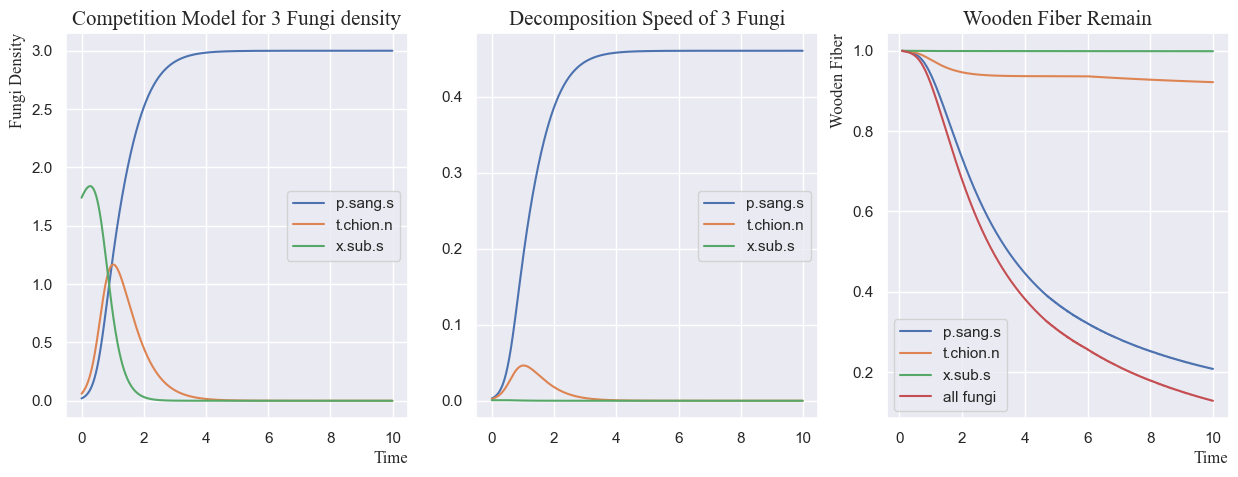

In [107]:
### data from temperature
r_p = p_temp_data[p_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_t = t_temp_data[t_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
r_x = x_temp_data[x_temp_data['temp_c'] == 22]['hyphal_rate'].values[0]
# print(r_p, r_t, r_x)
p_Decomposition_rate = 0.3743/122
t_Decomposition_rate = 0.2906/122
x_Decomposition_rate = 0.0855/122
n_p, n_t, n_x = 3, 3, 3
### unit of density: s micrograms dry mass per cubic centimer at 1 cm to g/m3
init_p, init_t, init_x = 0.02, 0.06, 1.74
time = np.arange(0, 10, 0.01)
competition_model(r_p, r_t, r_x, p_Decomposition_rate, t_Decomposition_rate, x_Decomposition_rate , n_p, n_t, n_x, init_p, init_t, init_x, time)

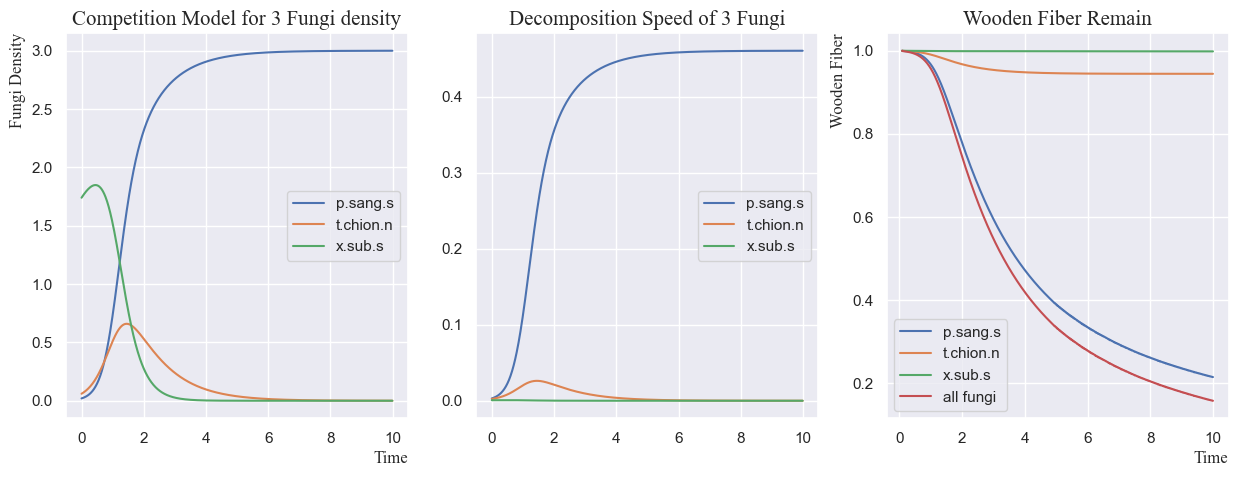

In [108]:

### data from temperature
r_p = p_moist_data[p_moist_data['matric_pot'] == -0.5]['hyphal_rate'].values[0]
r_t = t_moist_data[t_moist_data['matric_pot'] == -0.5]['hyphal_rate'].values[0]
r_x = x_moist_data[x_moist_data['matric_pot'] == -0.5]['hyphal_rate'].values[0]
# print(r_p, r_t, r_x)
p_Decomposition_rate = 0.3743/122
t_Decomposition_rate = 0.2906/122
x_Decomposition_rate = 0.0855/122
n_p, n_t, n_x = 3, 3, 3
### unit of density: s micrograms dry mass per cubic centimer at 1 cm to g/m3
init_p, init_t, init_x = 0.02, 0.06, 1.74
time = np.arange(0, 10, 0.01)
competition_model(r_p, r_t, r_x, p_Decomposition_rate, t_Decomposition_rate, x_Decomposition_rate , n_p, n_t, n_x, init_p, init_t, init_x, time)